In [19]:
# What is the goal of applying K-Means clustering in this dataset?
# How many clusters (K) do you think are appropriate? Justify your answer.
# Apply K-Means with K=3 and assign each student to a cluster.
#Visualize the clusters using a scatter plot (Study Hours vs Exam Score).
#Interpret each cluster: what type of students does it represent?
#How can the university use these clusters for personalized interventions?
#What challenges/limitations do you see in using K-Means clustering for this dataset?
#If new students join the dataset, how would the clustering need to be updated?
#Try running K-Means with K=2 and K=4. Compare the results — which clustering makes more sense?
#Suggest one improvement or alternative clustering method that could work better

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Capgemini - Mitsubishi\student_kmeans_dataset.csv")
df.head(10)

,Student_ID,Study_Hours,Exam_Score
0,1,2,20
1,2,3,25
2,3,4,28
3,4,6,45
4,5,7,50
5,6,8,48
6,7,10,70
7,8,11,68
8,9,12,72
9,10,14,85


In [21]:
#1. What is the goal of applying K-Means clustering in this dataset?
print("it is to group the students into clusters")

it is to group the students into clusters


In [22]:
#2. How many clusters (K) do you think are appropriate? Justify your answer.
print("""we can take K=3 
we can divide the students based on Low(fail),moderate(avg),high(pass)""")

we can take K=3 
we can divide the students based on Low(fail),moderate(avg),high(pass)


In [23]:
from sklearn.cluster import KMeans

X =df[['Study_Hours','Exam_Score']]
wcss=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

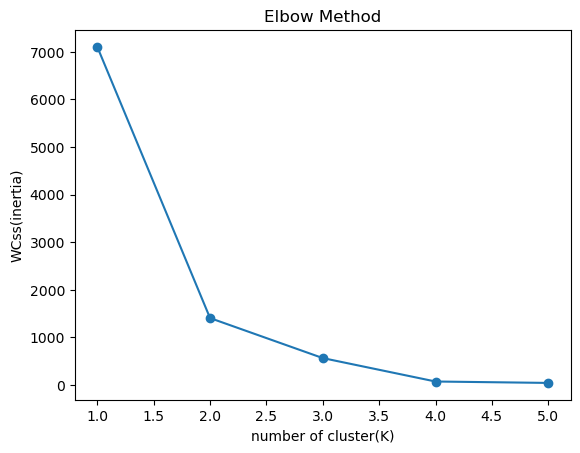

In [24]:
plt.plot(range(1,6),wcss,marker='o')
plt.xlabel('number of cluster(K)')
plt.ylabel('WCss(inertia)')
plt.title('Elbow Method')
plt.show()

In [25]:
#3. Apply K-Means with K=3 and assign each student to a cluster.
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df.head(10)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Student_ID,Study_Hours,Exam_Score,Cluster
0,1,2,20,2
1,2,3,25,2
2,3,4,28,2
3,4,6,45,0
4,5,7,50,0
5,6,8,48,0
6,7,10,70,1
7,8,11,68,1
8,9,12,72,1
9,10,14,85,1


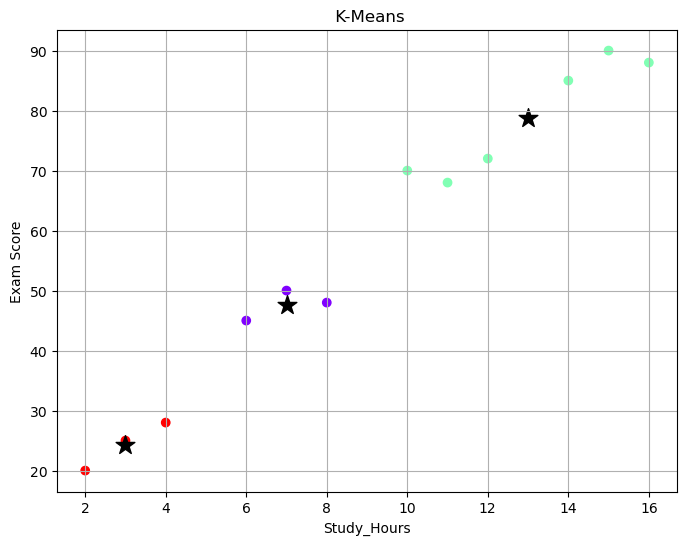

In [26]:
#4. Visualize the clusters using a scatter plot (Study Hours vs Exam Score).
plt.figure(figsize=(8,6))
plt.scatter(df['Study_Hours'],df['Exam_Score'], c=df['Cluster'], cmap='rainbow')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='*', label='Centroids')
plt.title(' K-Means')
plt.xlabel('Study_Hours')
plt.ylabel('Exam Score')
plt.grid()
plt.show()

In [27]:
#5. Interpret each cluster: what type of students does it represent?
print("Cluster 0 (Red, bottom-left)Low study hours, low exam scores")
print("Cluster 1 (Green, middle)Moderate study hours, average exam scores")
print("Cluster 2 (Purple, top-right)High study hours, high exam scores")


Cluster 0 (Red, bottom-left)Low study hours, low exam scores
Cluster 1 (Green, middle)Moderate study hours, average exam scores
Cluster 2 (Purple, top-right)High study hours, high exam scores


In [28]:
#6. How can the university use these clusters for personalized interventions?
print("Cluster 0: Extra support & motivation.")
print("Cluster 1: Push for improvement with structured guidance.")
print("Cluster 2: Enrichment opportunities & leadership roles.")

Cluster 0: Extra support & motivation.
Cluster 1: Push for improvement with structured guidance.
Cluster 2: Enrichment opportunities & leadership roles.


In [29]:
#7. What challenges/limitations do you see in using K-Means clustering for this dataset?
print("""K-Means is simple and useful for basic patterns, but it oversimplifies reality.
It may misclassify students, ignore hidden factors, and require careful preprocessing (scaling, outlier handling, right k value""")

K-Means is simple and useful for basic patterns, but it oversimplifies reality.
It may misclassify students, ignore hidden factors, and require careful preprocessing (scaling, outlier handling, right k value


In [30]:
#8. If new students join the dataset, how would the clustering need to be updated?
print("""K-Means needs to be retrained or updated when new students join.
You can either re-run K-Means on the whole dataset
or use incremental methods like MiniBatchKMeans for efficiency.""")

K-Means needs to be retrained or updated when new students join.
You can either re-run K-Means on the whole dataset
or use incremental methods like MiniBatchKMeans for efficiency.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


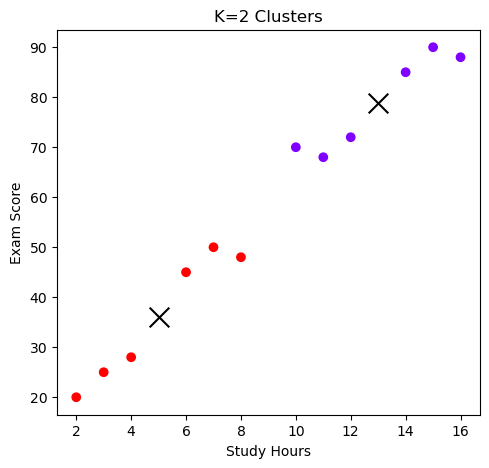

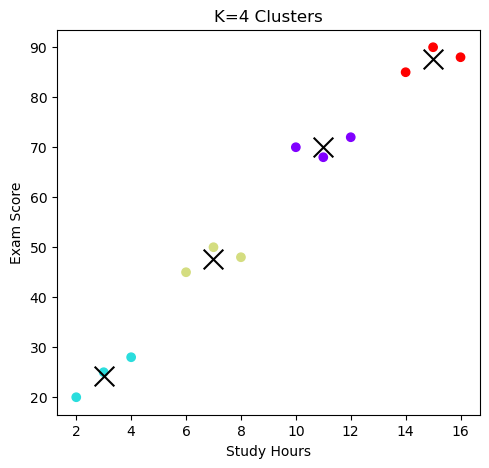

Using K=2 makes sense because it clearly separates students into two broad groups: 
low performers and high performers, which is useful for quick and simple interventions.


In [31]:
#9. Try running K-Means with K=2 and K=4. Compare the results — which clustering makes more sense?

kmeans2 = KMeans(n_clusters=2, random_state=0)
df['Cluster_K2'] = kmeans2.fit_predict(df[['Study_Hours', 'Exam_Score']])
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df['Study_Hours'], df['Exam_Score'], c=df['Cluster_K2'], cmap='rainbow')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black', s=200, marker='x')
plt.title("K=2 Clusters")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")

kmeans4 = KMeans(n_clusters=4, random_state=0)
df['Cluster_K4'] = kmeans4.fit_predict(df[['Study_Hours', 'Exam_Score']])
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.scatter(df['Study_Hours'], df['Exam_Score'], c=df['Cluster_K4'], cmap='rainbow')
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], c='black', s=200, marker='x')
plt.title("K=4 Clusters")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()
print("""Using K=2 makes sense because it clearly separates students into two broad groups: 
low performers and high performers, which is useful for quick and simple interventions.""")

In [32]:
#10 Suggest one improvement or alternative clustering method that could work better

print("""One improvement would be to use a Gaussian Mixture Model (GMM) instead of K-Means, 
since GMM allows soft clustering, meaning a student can belong partly to more than one group (e.g., between average and high performers), 
which better reflects real life student behavior.""")

One improvement would be to use a Gaussian Mixture Model (GMM) instead of K-Means, 
since GMM allows soft clustering, meaning a student can belong partly to more than one group (e.g., between average and high performers), 
which better reflects real life student behavior.
